In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from glob import glob
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

C:/Users/admin/Desktop/MyDC/First Semester/AIDI1003-Capstone/Final-Project/Capstone-Group-01/New folder/Skin_Disease/Dataset/Test/Acne\10_p.jpg


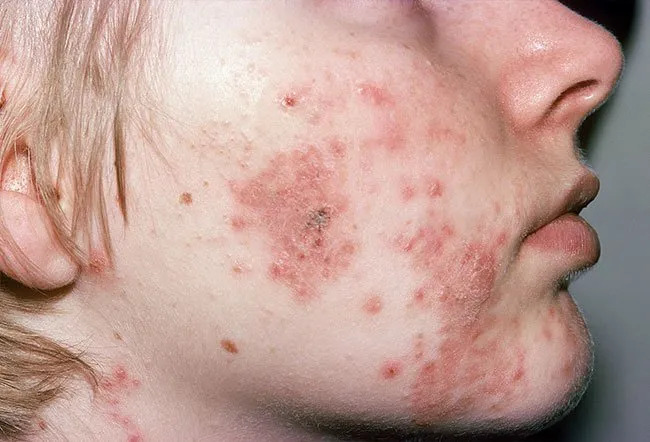

In [5]:

acne = list(glob('C:/Users/admin/Desktop/MyDC/First Semester/AIDI1003-Capstone/Final-Project/Capstone-Group-01/New folder/Skin_Disease/Dataset/Test/Acne/*'))
print(acne[0])
PIL.Image.open(str(acne[0]))


In [8]:
data_dir="C:/Users/admin/Desktop/MyDC/First Semester/AIDI1003-Capstone/Final-Project/Capstone-Group-01/New folder/Skin_Disease/Dataset/Train"

In [9]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2941 files belonging to 3 classes.
Using 2353 files for training.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2941 files belonging to 3 classes.
Using 588 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['Acne', 'Normal', 'Varicella']


In [13]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=3,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))

In [14]:
resnet_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 3)                1539      
 pper)                                                           
                                                                 
Total params: 24,638,339
Trainable params: 1,050,627
Non-trainable params: 23,587,712
__________________________________

In [15]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:

epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
 

Epoch 1/10
74/74 [==============================] - 317s 4s/step - loss: 0.4384 - accuracy: 0.8827 - val_loss: 0.0681 - val_accuracy: 0.9796
Epoch 2/10
74/74 [==============================] - 287s 4s/step - loss: 0.0478 - accuracy: 0.9868 - val_loss: 0.0507 - val_accuracy: 0.9813
Epoch 3/10
74/74 [==============================] - 314s 4s/step - loss: 0.0199 - accuracy: 0.9953 - val_loss: 0.0649 - val_accuracy: 0.9745
Epoch 4/10
74/74 [==============================] - 297s 4s/step - loss: 0.0124 - accuracy: 0.9962 - val_loss: 0.0321 - val_accuracy: 0.9898
Epoch 5/10
74/74 [==============================] - 295s 4s/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0278 - val_accuracy: 0.9915
Epoch 6/10
74/74 [==============================] - 296s 4s/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0314 - val_accuracy: 0.9881
Epoch 7/10
74/74 [==============================] - 288s 4s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 0.9898
Epoch 8/10
74

In [17]:
pred=resnet_model.predict(val_ds)
print(pred)

19/19 [==============================] - 111s 6s/step
[[9.9997342e-01 1.8844847e-10 2.6540432e-05]
 [3.8805625e-11 1.0000000e+00 1.1982288e-09]
 [4.0346663e-08 2.9415858e-07 9.9999964e-01]
 ...
 [1.7907065e-03 8.9548121e-07 9.9820840e-01]
 [9.9987447e-01 1.2318426e-05 1.1326410e-04]
 [4.7723397e-13 1.0000000e+00 3.2838281e-09]]


In [18]:
precision = precision_score(val_ds, pred)
recall = recall_score(val_ds, pred)
f1_score_ = f1_score(val_ds, pred)
confusion_matrix_ = confusion_matrix(val_ds, pred)

print("Precision:", precision)
print("Recall:",recall)
print("F1-Score:", f1_score_)
print("\nConfusion matrix")
print(confusion_matrix_)

ValueError: Found input variables with inconsistent numbers of samples: [19, 588]

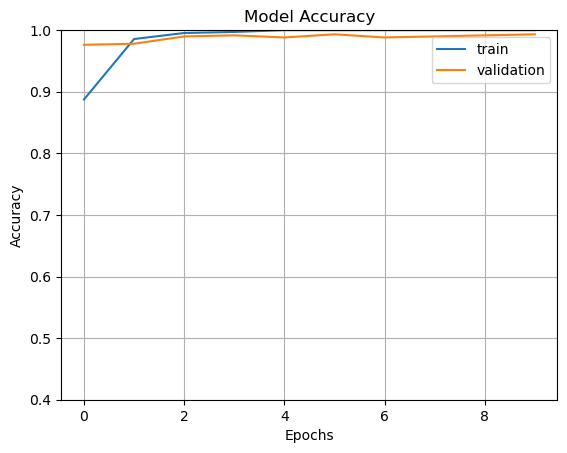

In [55]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

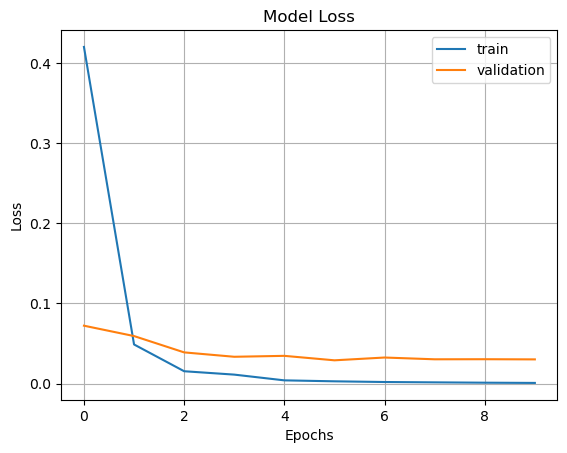

In [56]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [61]:
resnet_model.save_weights('resnet50_weights.h5')

In [73]:
resnet_model.load_weights('resnet50_weights.h5')

In [74]:
import cv2
image=cv2.imread(str(acne[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [75]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 150ms/step
[[8.2517574e-03 2.0506717e-05 9.9172771e-01]]


In [76]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is Varicella
